In [2]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

# from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
# from WIPL_python_analysis.DualPol import DualPol
# from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')


In [11]:
np.linspace(24,63,10)

array([24.        , 28.33333333, 32.66666667, 37.        , 41.33333333,
       45.66666667, 50.        , 54.33333333, 58.66666667, 63.        ])

In [8]:
(53-34)/2

9.5

In [26]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

In [27]:
pol_list = ['H', 'V']
BASE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/WIPL results/no_baggage_spheroid/test/'

In [28]:
results_dict = {x : {p : None for p in pol_list} for x in ['L10', 'L30']}



In [34]:
for pol in pol_list:
    for L in [10,30]:
        path = BASE_PATH + f'testing_spheroid_H_L{L}_dict.pkl'
        conv = converter.from_pickle(path)
        df = conv.generate_output_df()
        
        output_path = BASE_PATH + f'testing_spheroid_H_L{L}.csv'
        df.to_csv(output_path)
        results_dict[f'L{L}'][pol] = df 



Text(0.5, 1.0, 'Variation of PhiDP across models at 5.6GHz')

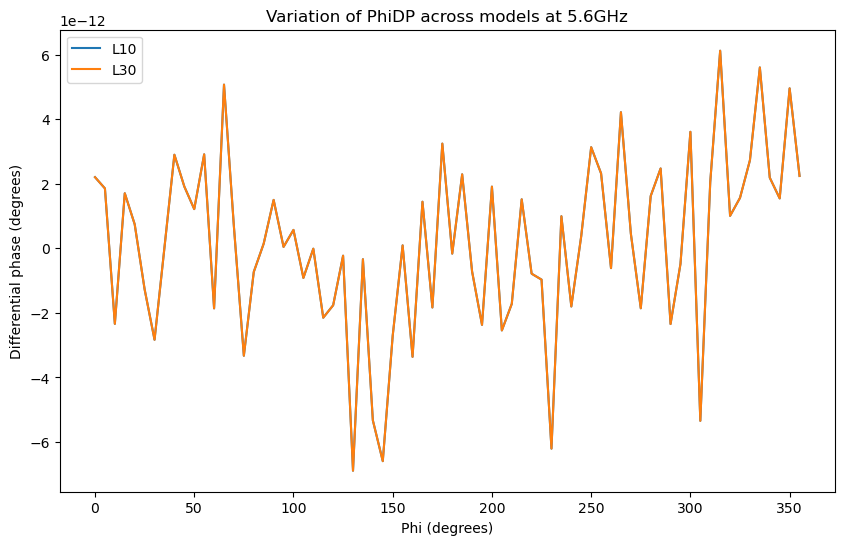

In [40]:
for model in ['L10', 'L30']:
    # dp = DualPol(results_dict[model]['H'], results_dict[model]['V'], read_from_df=True)
    # dp._calculate_differential_phase()

    rcs = results_dict[model]['V']['Ephi']

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    
    plt.plot(results_dict[model]['H']['phi'], rcs *(5.6/30)**2, label=model, linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of PhiDP across models at 5.6GHz')

In [38]:
HFLY_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/WIPL results/syrphus_ribesii_disc3d/testing_symbols/'

In [14]:
results_dict_hfly = {x : {p : None for p in pol_list} for x in [10, 14,16]}

In [20]:
for L in [10,14,16]:
    for pol in pol_list:

        path = HFLY_PATH + f'hoverfly_0400_p0_s0_{pol}_L{L}_dict.pkl'
        conv = converter.from_pickle(path)
        df = conv.generate_output_df()
        
        output_path = HFLY_PATH + f'hoverfly_test_p0_s0_{pol}_L{L}_csv.csv'
        df.to_csv(output_path)
        results_dict_hfly[L][pol] = df 



Text(0.5, 1.0, 'Variation of PhiDP across models at 5.6GHz')

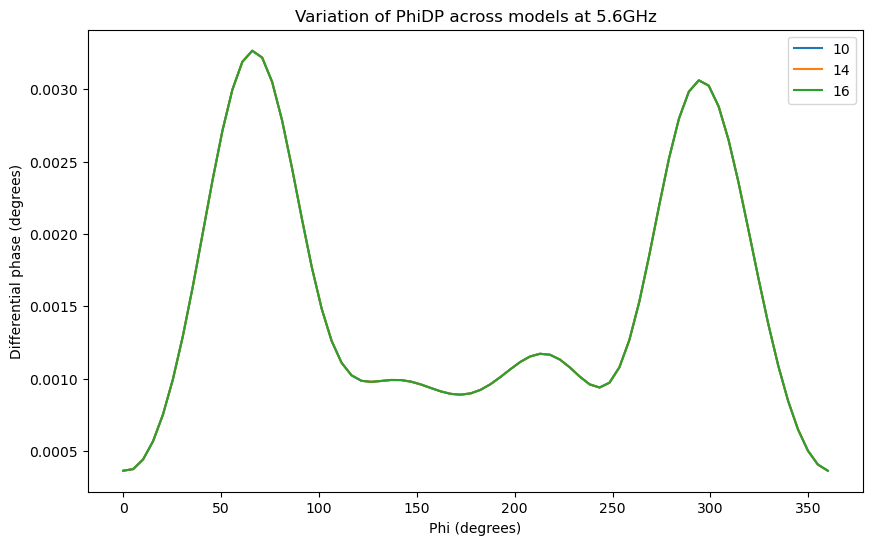

In [24]:
for model in [10,14,16]:
    # dp = DualPol(results_dict[model]['H'], results_dict[model]['V'], read_from_df=True)
    # dp._calculate_differential_phase()

    rcs = results_dict_hfly[model]['V']['Total_RCS']

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    
    plt.plot(results_dict_hfly[model]['H']['phi'], rcs * (5.6/30)**2, label=f'{model}', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of PhiDP across models at 5.6GHz')